<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>EXAMEN: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">EXAMEN PRÁCTICO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Examen Práctico de Interciclo
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

Primero se cargan las librerías necesarias para la ejecución de todo el programa

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, mean_absolute_error

Para la primera parte se pide realizar el análisis de las redes sociales del alcual presidente. En este caso se realizará el análisis de sus tweets en su cuenta oficial de Twitter https://twitter.com/LassoGuillermo. Para la extracción de la información se utilizó la herramienta Octaparse, que permite hacer web scraping de forma automática. Los datos recolectados se guardaron en el archivo Data.csv, y corresponden a:

- El usuario que realiza la publicación
- La Fecha en la que se realiza la publicación
- El texto del tweet publicado
- El número de comentarios
- El número de veces que la publicación fue compartida
- El número de likes

Como primer paso se procede a aplicar técnicas Deprocesamiento de Lenguaje Natural (NPL) en la columna de los Tweets. En primer lugar se procede a eliminar información innecesaria como signos de puntuación (.,:) y saltos de línea (\n). Posteriormente se convierte todo el texto a minúsculas (Lowercase).

Luego se realiza un análisis de la información para obtener nuevos datos de interés como:

- El número de palabras que contiene la publicación
- La cantidad de etiquetas en la publicación
- El número de HashTags usados en la publicación

Y finalmente se ordena la información obtenida en base al número de "Likes" de cada publicación (de menor a mayor).

In [2]:
df = pd.read_csv('Data.csv')
df['Tweet'] = [str(tweet).strip().replace('.', '').replace(':', '').replace('\n', '') for tweet in df['Tweet']]
df['Tweet'] = df['Tweet'].str.lower()
df['Comment'] = [comment.replace('.','').replace('K','')+'00' if '.' in comment else comment.replace('K','')+'000' if 'K' in comment else comment for comment in df['Comment']]
df['Share'] = [share.replace('.','').replace('K','')+'00' if '.' in share else share.replace('K','')+'000' if 'K' in share else share for share in df['Share']]
df['Like'] = [like.replace('.','').replace('K','')+'00' if '.' in like else like.replace('K','')+'000' if 'K' in like else like for like in df['Like']]
df['Like'] = df['Like'].apply(pd.to_numeric)
df['#Words'] = [len(str(tweet).split(' ')) for tweet in df['Tweet']]
df['#HashTags'] = [len(str(tweet).split('#'))-1 for tweet in df['Tweet']]
df['#Tags'] = [len(str(tweet).split('@'))-1 for tweet in df['Tweet']]

df = df.sort_values(by=['Like']).reset_index(drop=True)

Otro dato interesante se obtiene a través del análisis de palabras utilizadas en cada Tweet. Por medio de la librería NLTK, que permite realizar NPL, se consigue una lista de las palabras más frecuentes utilizadas en todas las publicaciones. Para ello se omiten las Stopwords, que son palabras que carecen de información relevante, sin embargo tienden a repetirse más en la oración como los artículos (él, la, ellos). Una vez que se obtiene la lista de palabras más frecuentes se agrega una nueva columna al DataSet con la cantidad de veces que la publicación ha usado las palabras de esta lista.

In [3]:
tweets = [word for word in " ".join(df["Tweet"]).split() if word not in stopwords.words('spanish')]
words = Counter(tweets).most_common(20)
freq = [i[0] for i in words]
Frequency = [len([i for i in freq if i in tweet]) for tweet in df['Tweet']]
df['Frequency'] = Frequency
df.head(15)

User    Date  \
0                  Guillermo Lasso  10-Mar   
1                      AsíAmaneció   8-Mar   
2   Red de Periodistas Libres #RPL   9-Mar   
3          Movimiento CREO Ecuador   9-Feb   
4                  Guillermo Lasso  11-Mar   
5                    Josué Sanchez   4-Feb   
6                  Guillermo Lasso   9-Mar   
7                  Guillermo Lasso  23-Feb   
8                  Guillermo Lasso  11-Mar   
9                  Guillermo Lasso   7-Feb   
10            Cámara de Industrias  11-Mar   
11                 Guillermo Lasso   8-Mar   
12             María Elena Machuca   3-May   
13                 Guillermo Lasso   8-Mar   
14                 Guillermo Lasso   8-Mar   

                                                Tweet Comment Share  Like  \
0   garantizaremos la transparencia y mecanismos d...      16    17    70   
1   al aire periodistas ecuatorianas mujeres parti...      22    41   167   
2   #buenasnoches | a las 2000, miembros de la @rp...      14    42   178   
3   el 135% del total de las actas representa a 1,...      43    55   230   
4   encuentros como este enriquecen al país trabaj...      25    91   298   
5   ¡#guayaquil votará por el equipo del cambio! e...      12    74   317   
6   muchas gracias a los ganaderos que asistieron ...      25    64   326   
7   muchas gracias a quienes se conectaron al en v...      41    39   351   
8   hoy a las 17h00, #encontrémonosporlaruralidad ...      47   108   376   
9   ¡ahora! rueda de prensa sobre las elecciones d...      52    56   397   
10  hoy nos acompaña el candidato a la presidencia...      26   106   408   
11  la cooperación internacional debe de tener un ...      31   107   417   
12  presidente @lassoguillermo el camino está traz...      40    87   428   
13  implementaremos mecanismos de protección, denu...      38   127   441   
14  gracias a @wqradio_ec por la invitación a este...      50   128   442   

    #Words  #HashTags  #Tags  Frequency  
0       28          0      0          1  
1       21          1      2          0  
2       27          6      3          1  
3       34          1      0          1  
4       36          0      0          5  
5       39          3      0          9  
6       25          1      0          4  
7       19          0      0          2  
8        7          1      0          1  
9       11          1      0          1  
10      21          0      1          2  
11      32          1      0          3  
12      27          1      1          2  
13      38          1      0          2  
14      33          1      1          2

Las colunmnas que se utilizarán como datos de entrada para nuestra regresión serán entonces:

- El número de palabras del tweet
- El número de HashTags usados
- La cantidad de etiquetas
- La cantidad de palabras frecuentes usadas

La variable de salida que se intentará predecir será la cantidad de Likes que la publicación obtendrá.

Para el entrenamiento del sistema se divide entonces las variables de entrada y de salida en Train y Test para la entapa de entrenamiento y pruebas en un 80 y 20% respectivamente. 

In [4]:
TRwords, TSwords, TRhashtags, TShashtags, TRtags, TStags, TRfreq, TSfreq, TRlikes, TSlikes = tts(df['#Words'], df['#HashTags'], df['#Tags'], df['Frequency'], df['Like'], test_size=0.2)

In [5]:
X = pd.DataFrame([TRwords, TRhashtags, TRtags, TRfreq]).T

Como se tienen cuatro parámetros de entrada, se realiza una reducción de dimensionalidad con el fin de tener una sola entrada y de esta forma realizar las gráficas respectivas en 2 dimensiones. Para esto se utiliza la técnica de SVD.

In [6]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X) 
var = svd.explained_variance_ratio_
X_svd = pd.DataFrame(data = X_svd)
X_svd = X_svd.sort_values(by=[0]).values

In [7]:
X

#Words  #HashTags  #Tags  Frequency
67       19          1      0          4
224       6          0      0          0
302      42          0      1          4
141      41          0      1          3
218      29          0      0          0
..      ...        ...    ...        ...
101      29          1      0          3
226      31          0      0          1
43       24          1      1          2
166      36          1      0          5
12       27          1      1          2

[244 rows x 4 columns]

La regresión se realiza por medio de una máquina de vectores de soporte (SVM) que permite realizar un aprendizaje de máquina supervisado. En este caso se utilizó un kernel lineal.

In [8]:
clf=SVC(C=1,kernel="linear")
clf.fit(X_svd, TRlikes)
pred = clf.predict(X_svd)

En la gráfica se muestra la comparación de los datos reales vs. los predichos con los datos de entrenamiento.

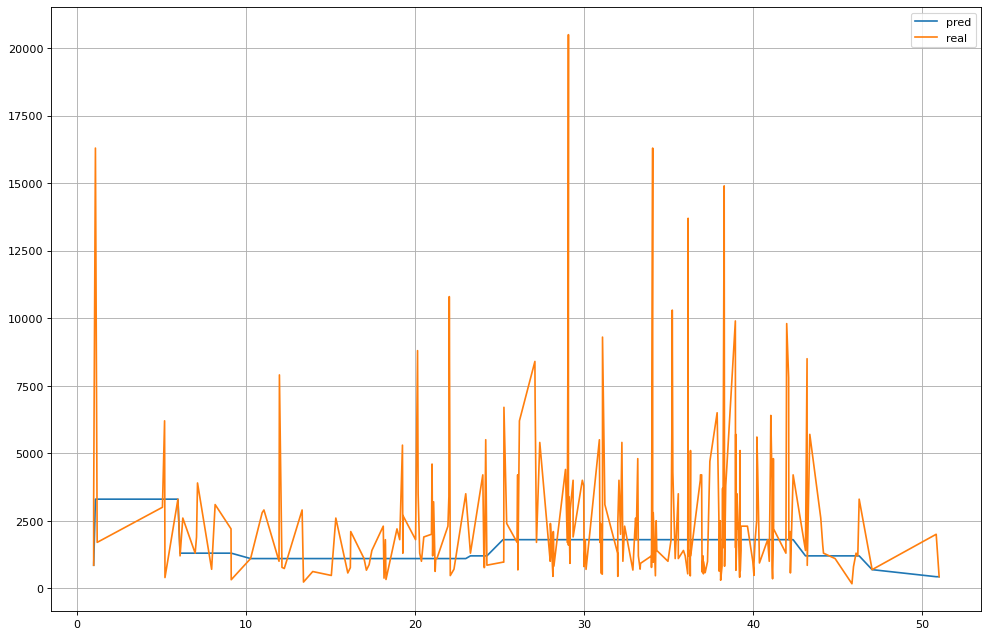

In [9]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(X_svd, pred, label='pred')
plt.plot(X_svd, TRlikes, label='real')
plt.legend()
plt.grid()
plt.show()

Se procede a realizar la predicción de datos con los datos reservados previamente para las pruebas.

In [10]:
Xpred = pd.DataFrame([TSwords, TShashtags, TStags, TSfreq]).T

In [11]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
Xpred_svd = svd.fit_transform(Xpred) 
var = svd.explained_variance_ratio_
Xpred_svd = pd.DataFrame(data = Xpred_svd)
Xpred_svd = Xpred_svd.sort_values(by=[0]).values

In [12]:
pred = clf.predict(Xpred_svd)

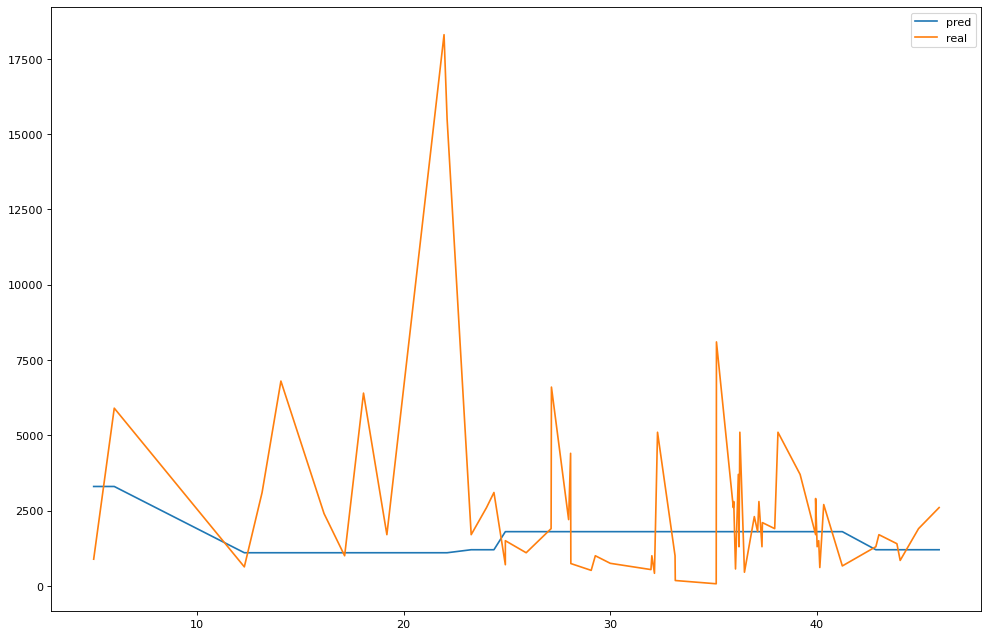

In [13]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(Xpred_svd, pred, label='pred')
plt.plot(Xpred_svd, TSlikes, label='real')
plt.legend()
plt.show()

Como se puede ver en la gráfica, la predicción realizada por el algoritmo no es la mejor. Se puede decir que los parámetros de entrada escogidos no son los que definen cuál será la aceptación de la publicación. A continuación se presenta el Error Cuadrado Medio y el Error Absoluto Medio de las predicciones realizadas.

In [14]:
mse = mean_squared_error(TSlikes, pred)
mse

11959359.049180327

In [15]:
mae = mean_absolute_error(TSlikes, pred)
mae

1859.672131147541

### Simulación sistema de vacunación

In [16]:
import simpy
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Se toma uno de los recintos en la parroquia El Batán de Cuenca. En esta zona hay 12738 personas que deberán votar en uno de los tres Recintos Electorales [1]. Suponiendo que todas las personas se reparten equitativamente en los 3 recintos, en cada recinto se atenderán a 4246 personas. 

Puesto a que sólo el 80% de la población será vacunada, de las 4246 personas que deberían asistir al recinto, se espera que realmente asistan 3397 personas.

Puesto a que el horario de atención para la vacunación es de 08h00 a 17h00 [2], se define el tiempo de ejecución de la simulación diario en 540 (9 horas en minutos)

In [17]:
TIEMPO = 540
PUNTOS_VACUNACION0 = 6
PUNTOS_VACUNACION = 6
PUNTOS_VACUNACION2 = int(PUNTOS_VACUNACION/2)
DIAS = 100

vacunados1 = []
no_vacunados1 = []

s1 = 0
n1 = 0

vacunados2 = []
no_vacunados2 = []

s2 = 0
n2 = 0

tiempo_espera = []
tiempo = 0

In [18]:
class Centro_Covid(object):
    def __init__(self, env, puntos_vacunacion):
        self.env = env
        self.puntos_vacunacion = simpy.Resource(env, puntos_vacunacion)
        
    def poner_vacuna(self, paciente, dosis):
        global s1
        global s2
        global tiempo
        print('> El %s va a vacunarse a las %.2f. %s' % (paciente, env.now, dosis))
        t = random.randint(5,10)
        tiempo += t
        yield self.env.timeout(t)
        print('> El %s ha sido vacunado a las %.2f. %s' % (paciente, env.now, dosis))
        if '1' in dosis:
            s1+=1
        else:
            s2+=1
    
    def esperar(self, paciente, dosis):
        global tiempo
        print('_  El %s comienza su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        tiempo += 20
        yield self.env.timeout(20)
        print('_  El %s termina su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.process(self.certificar(paciente, dosis))
        
    def certificar(self, paciente, dosis):
        global tiempo
        print('@   El %s va a recibir su certificado a las %.2f. %s' % (paciente, env.now, dosis))
        t = random.randint(2,3)
        tiempo += t
        yield self.env.timeout(t)
        print('@   El %s ha recibido su certificado a las %.2f. %s y sale del recinto' % (paciente, env.now, dosis))

In [19]:
def llega_paciente(env, paciente, centro_covid, dosis):
    global n1
    global n2
    print('El %s llega al centro de vacunación a las %.2f. %s' % (paciente, env.now, dosis))
    with centro_covid.puntos_vacunacion.request() as punto_vacunacion:
        if random.randint(1,10) < 9:
            yield punto_vacunacion
            yield env.process(centro_covid.poner_vacuna(paciente, dosis))
            env.process(centro_covid.esperar(paciente, dosis))
        else:
            print('! El %s no ha podido vacunarse la %s y sale del recinto a las %.2f.' % (paciente, dosis, env.now))
            if '1' in dosis:
                n1+=1
            else:
                n2+=1

In [20]:
def ejecutar(env, puntos_vacunacion, dosis):
    centro_covid = Centro_Covid(env, puntos_vacunacion)
    for i in range(PUNTOS_VACUNACION):
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
        
    while True:
        yield env.timeout(random.randint(3,15))
        i+=1
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))

In [21]:
random.seed(88)

for i in range(DIAS):
    print()
    print('------ DÍA ' + str(i+1) + ' ------')
    print()
    
    s1 = 0
    n1 = 0
    s2 = 0
    n2 = 0
    tiempo = 0
    
    env = simpy.Environment()
    if i >= 30:
        if sum(vacunados2) < 3397:
            env.process(ejecutar(env, PUNTOS_VACUNACION, '2da dosis'))
        if sum(vacunados1) < 3397:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION2
        else:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION0
    
    if sum(vacunados1) < 3397:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '1ra dosis'))

        
    env.run(until=TIEMPO)
    
    vacunados1.append(s1)
    no_vacunados1.append(n1)
    vacunados2.append(s2)
    no_vacunados2.append(n2)
    tiempo_espera.append(tiempo)


------ DÍA 1 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 5 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 ha sido vacunado a las 6.00. 1ra dosis
> El Paciente 6 ha sido vacunado a las 6.00. 1ra dosis
_  El Paciente 4 comienza su tiempo de espera a las 6.00. 1ra dosis
_  El Paciente 6 comienza su tiempo de espera a las 6.00

> El Paciente 5 ha sido vacunado a las 5.00. 1ra dosis
_  El Paciente 5 comienza su tiempo de espera a las 5.00. 1ra dosis
> El Paciente 2 ha sido vacunado a las 9.00. 1ra dosis
> El Paciente 3 ha sido vacunado a las 9.00. 1ra dosis
_  El Paciente 2 comienza su tiempo de espera a las 9.00. 1ra dosis
_  El Paciente 3 comienza su tiempo de espera a las 9.00. 1ra dosis
El Paciente 7 llega al centro de vacunación a las 11.00. 1ra dosis
> El Paciente 7 va a vacunarse a las 11.00. 1ra dosis
> El Paciente 7 ha sido vacunado a las 21.00. 1ra dosis
_  El Paciente 7 comienza su tiempo de espera a las 21.00. 1ra dosis
El Paciente 8 llega al centro de vacunación a las 24.00. 1ra dosis
> El Paciente 8 va a vacunarse a las 24.00. 1ra dosis
_  El Paciente 5 termina su tiempo de espera a las 25.00. 1ra dosis
@   El Paciente 5 va a recibir su certificado a las 25.00. 1ra dosis
@   El Paciente 5 ha recibido su certificado a las 28.00. 1ra dosis y sale del recinto
_  El Paciente 2 termina su tiempo de es

_  El Paciente 21 comienza su tiempo de espera a las 160.00. 1ra dosis
El Paciente 22 llega al centro de vacunación a las 161.00. 1ra dosis
> El Paciente 22 va a vacunarse a las 161.00. 1ra dosis
_  El Paciente 20 termina su tiempo de espera a las 164.00. 1ra dosis
@   El Paciente 20 va a recibir su certificado a las 164.00. 1ra dosis
> El Paciente 22 ha sido vacunado a las 167.00. 1ra dosis
@   El Paciente 20 ha recibido su certificado a las 167.00. 1ra dosis y sale del recinto
_  El Paciente 22 comienza su tiempo de espera a las 167.00. 1ra dosis
El Paciente 23 llega al centro de vacunación a las 172.00. 1ra dosis
> El Paciente 23 va a vacunarse a las 172.00. 1ra dosis
> El Paciente 23 ha sido vacunado a las 179.00. 1ra dosis
_  El Paciente 23 comienza su tiempo de espera a las 179.00. 1ra dosis
_  El Paciente 21 termina su tiempo de espera a las 180.00. 1ra dosis
@   El Paciente 21 va a recibir su certificado a las 180.00. 1ra dosis
El Paciente 24 llega al centro de vacunación a las

> El Paciente 9 va a vacunarse a las 39.00. 1ra dosis
@   El Paciente 7 ha recibido su certificado a las 41.00. 1ra dosis y sale del recinto
> El Paciente 9 ha sido vacunado a las 46.00. 1ra dosis
_  El Paciente 9 comienza su tiempo de espera a las 46.00. 1ra dosis
El Paciente 10 llega al centro de vacunación a las 51.00. 1ra dosis
> El Paciente 10 va a vacunarse a las 51.00. 1ra dosis
_  El Paciente 8 termina su tiempo de espera a las 54.00. 1ra dosis
@   El Paciente 8 va a recibir su certificado a las 54.00. 1ra dosis
El Paciente 11 llega al centro de vacunación a las 56.00. 1ra dosis
> El Paciente 10 ha sido vacunado a las 56.00. 1ra dosis
@   El Paciente 8 ha recibido su certificado a las 56.00. 1ra dosis y sale del recinto
> El Paciente 11 va a vacunarse a las 56.00. 1ra dosis
_  El Paciente 10 comienza su tiempo de espera a las 56.00. 1ra dosis
El Paciente 12 llega al centro de vacunación a las 60.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 60.00. 1ra dosis
> El Paciente 

_  El Paciente 26 termina su tiempo de espera a las 202.00. 1ra dosis
@   El Paciente 26 va a recibir su certificado a las 202.00. 1ra dosis
@   El Paciente 26 ha recibido su certificado a las 204.00. 1ra dosis y sale del recinto
> El Paciente 28 ha sido vacunado a las 205.00. 1ra dosis
_  El Paciente 28 comienza su tiempo de espera a las 205.00. 1ra dosis
El Paciente 29 llega al centro de vacunación a las 209.00. 1ra dosis
> El Paciente 29 va a vacunarse a las 209.00. 1ra dosis
_  El Paciente 27 termina su tiempo de espera a las 213.00. 1ra dosis
@   El Paciente 27 va a recibir su certificado a las 213.00. 1ra dosis
> El Paciente 29 ha sido vacunado a las 216.00. 1ra dosis
@   El Paciente 27 ha recibido su certificado a las 216.00. 1ra dosis y sale del recinto
_  El Paciente 29 comienza su tiempo de espera a las 216.00. 1ra dosis
El Paciente 30 llega al centro de vacunación a las 219.00. 1ra dosis
> El Paciente 30 va a vacunarse a las 219.00. 1ra dosis
> El Paciente 30 ha sido vacunad

El Paciente 15 llega al centro de vacunación a las 80.00. 1ra dosis
> El Paciente 14 ha sido vacunado a las 80.00. 1ra dosis
> El Paciente 15 va a vacunarse a las 80.00. 1ra dosis
_  El Paciente 14 comienza su tiempo de espera a las 80.00. 1ra dosis
El Paciente 16 llega al centro de vacunación a las 86.00. 1ra dosis
> El Paciente 16 va a vacunarse a las 86.00. 1ra dosis
> El Paciente 15 ha sido vacunado a las 89.00. 1ra dosis
_  El Paciente 15 comienza su tiempo de espera a las 89.00. 1ra dosis
_  El Paciente 13 termina su tiempo de espera a las 94.00. 1ra dosis
@   El Paciente 13 va a recibir su certificado a las 94.00. 1ra dosis
El Paciente 17 llega al centro de vacunación a las 94.00. 1ra dosis
> El Paciente 16 ha sido vacunado a las 94.00. 1ra dosis
> El Paciente 17 va a vacunarse a las 94.00. 1ra dosis
_  El Paciente 16 comienza su tiempo de espera a las 94.00. 1ra dosis
@   El Paciente 13 ha recibido su certificado a las 96.00. 1ra dosis y sale del recinto
> El Paciente 17 ha sid

@   El Paciente 3 ha recibido su certificado a las 33.00. 1ra dosis y sale del recinto
_  El Paciente 8 termina su tiempo de espera a las 37.00. 1ra dosis
@   El Paciente 8 va a recibir su certificado a las 37.00. 1ra dosis
_  El Paciente 9 termina su tiempo de espera a las 39.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 39.00. 1ra dosis
@   El Paciente 8 ha recibido su certificado a las 39.00. 1ra dosis y sale del recinto
> El Paciente 11 ha sido vacunado a las 41.00. 1ra dosis
@   El Paciente 9 ha recibido su certificado a las 41.00. 1ra dosis y sale del recinto
_  El Paciente 11 comienza su tiempo de espera a las 41.00. 1ra dosis
El Paciente 12 llega al centro de vacunación a las 46.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 46.00. 1ra dosis
_  El Paciente 10 termina su tiempo de espera a las 47.00. 1ra dosis
@   El Paciente 10 va a recibir su certificado a las 47.00. 1ra dosis
@   El Paciente 10 ha recibido su certificado a las 50.00. 1ra dosis y sale 

> El Paciente 67 va a vacunarse a las 533.00. 1ra dosis
_  El Paciente 65 termina su tiempo de espera a las 537.00. 1ra dosis
@   El Paciente 65 va a recibir su certificado a las 537.00. 1ra dosis
@   El Paciente 65 ha recibido su certificado a las 539.00. 1ra dosis y sale del recinto

------ DÍA 30 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 2 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 3 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 5 va a va

El Paciente 35 llega al centro de vacunación a las 276.00. 1ra dosis
El Paciente 34 llega al centro de vacunación a las 276.00. 2da dosis
> El Paciente 35 va a vacunarse a las 276.00. 1ra dosis
> El Paciente 34 va a vacunarse a las 276.00. 2da dosis
_  El Paciente 31 termina su tiempo de espera a las 277.00. 2da dosis
@   El Paciente 31 va a recibir su certificado a las 277.00. 2da dosis
El Paciente 36 llega al centro de vacunación a las 280.00. 1ra dosis
@   El Paciente 31 ha recibido su certificado a las 280.00. 2da dosis y sale del recinto
> El Paciente 36 va a vacunarse a las 280.00. 1ra dosis
> El Paciente 34 ha sido vacunado a las 281.00. 2da dosis
_  El Paciente 34 comienza su tiempo de espera a las 281.00. 2da dosis
_  El Paciente 32 termina su tiempo de espera a las 286.00. 2da dosis
@   El Paciente 32 va a recibir su certificado a las 286.00. 2da dosis
El Paciente 35 llega al centro de vacunación a las 286.00. 2da dosis
! El Paciente 35 no ha podido vacunarse la 2da dosis y s

@   El Paciente 54 ha recibido su certificado a las 519.00. 2da dosis y sale del recinto
El Paciente 57 llega al centro de vacunación a las 520.00. 1ra dosis
> El Paciente 57 va a vacunarse a las 520.00. 1ra dosis
_  El Paciente 55 termina su tiempo de espera a las 521.00. 2da dosis
@   El Paciente 55 va a recibir su certificado a las 521.00. 2da dosis
@   El Paciente 54 ha recibido su certificado a las 521.00. 1ra dosis y sale del recinto
> El Paciente 57 ha sido vacunado a las 522.00. 2da dosis
_  El Paciente 57 comienza su tiempo de espera a las 522.00. 2da dosis
@   El Paciente 55 ha recibido su certificado a las 523.00. 2da dosis y sale del recinto
El Paciente 58 llega al centro de vacunación a las 524.00. 2da dosis
> El Paciente 58 va a vacunarse a las 524.00. 2da dosis
> El Paciente 57 ha sido vacunado a las 527.00. 1ra dosis
_  El Paciente 57 comienza su tiempo de espera a las 527.00. 1ra dosis
_  El Paciente 55 termina su tiempo de espera a las 528.00. 1ra dosis
@   El Pacient

@   El Paciente 9 va a recibir su certificado a las 86.00. 2da dosis
> El Paciente 12 ha sido vacunado a las 87.00. 1ra dosis
> El Paciente 12 ha sido vacunado a las 87.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 87.00. 1ra dosis
_  El Paciente 12 comienza su tiempo de espera a las 87.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 88.00. 2da dosis y sale del recinto
_  El Paciente 9 termina su tiempo de espera a las 89.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 89.00. 1ra dosis
_  El Paciente 11 termina su tiempo de espera a las 89.00. 2da dosis
@   El Paciente 11 va a recibir su certificado a las 89.00. 2da dosis
El Paciente 14 llega al centro de vacunación a las 89.00. 2da dosis
> El Paciente 14 va a vacunarse a las 89.00. 2da dosis
El Paciente 13 llega al centro de vacunación a las 90.00. 1ra dosis
> El Paciente 13 va a vacunarse a las 90.00. 1ra dosis
> El Paciente 13 ha sido vacunado a las 91.00. 2da dosis
@   El Paci

> El Paciente 60 va a vacunarse a las 537.00. 1ra dosis
_  El Paciente 57 termina su tiempo de espera a las 538.00. 1ra dosis
@   El Paciente 57 va a recibir su certificado a las 538.00. 1ra dosis

------ DÍA 39 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 2 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 va a vacunarse a las 0.00. 2da dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 4.00. 2da dosis


_  El Paciente 9 termina su tiempo de espera a las 60.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 60.00. 1ra dosis
El Paciente 10 llega al centro de vacunación a las 60.00. 2da dosis
! El Paciente 10 no ha podido vacunarse la 2da dosis y sale del recinto a las 60.00.
El Paciente 13 llega al centro de vacunación a las 62.00. 1ra dosis
@   El Paciente 9 ha recibido su certificado a las 62.00. 1ra dosis y sale del recinto
> El Paciente 13 va a vacunarse a las 62.00. 1ra dosis
> El Paciente 9 ha sido vacunado a las 63.00. 2da dosis
_  El Paciente 9 comienza su tiempo de espera a las 63.00. 2da dosis
_  El Paciente 10 termina su tiempo de espera a las 64.00. 1ra dosis
@   El Paciente 10 va a recibir su certificado a las 64.00. 1ra dosis
@   El Paciente 10 ha recibido su certificado a las 67.00. 1ra dosis y sale del recinto
> El Paciente 13 ha sido vacunado a las 71.00. 1ra dosis
_  El Paciente 13 comienza su tiempo de espera a las 71.00. 1ra dosis
El Paciente 11 llega 

El Paciente 20 llega al centro de vacunación a las 128.00. 2da dosis
> El Paciente 20 va a vacunarse a las 128.00. 2da dosis
> El Paciente 16 ha sido vacunado a las 130.00. 1ra dosis
@   El Paciente 16 ha recibido su certificado a las 130.00. 2da dosis y sale del recinto
_  El Paciente 16 comienza su tiempo de espera a las 130.00. 1ra dosis
> El Paciente 19 ha sido vacunado a las 131.00. 2da dosis
_  El Paciente 19 comienza su tiempo de espera a las 131.00. 2da dosis
_  El Paciente 17 termina su tiempo de espera a las 134.00. 2da dosis
@   El Paciente 17 va a recibir su certificado a las 134.00. 2da dosis
El Paciente 21 llega al centro de vacunación a las 135.00. 2da dosis
> El Paciente 21 va a vacunarse a las 135.00. 2da dosis
_  El Paciente 14 termina su tiempo de espera a las 136.00. 1ra dosis
@   El Paciente 14 va a recibir su certificado a las 136.00. 1ra dosis
> El Paciente 20 ha sido vacunado a las 136.00. 2da dosis
_  El Paciente 20 comienza su tiempo de espera a las 136.00. 2d

_  El Paciente 10 comienza su tiempo de espera a las 74.00. 1ra dosis
_  El Paciente 9 termina su tiempo de espera a las 76.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 76.00. 2da dosis
_  El Paciente 9 termina su tiempo de espera a las 77.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 77.00. 1ra dosis
El Paciente 11 llega al centro de vacunación a las 77.00. 1ra dosis
> El Paciente 11 va a vacunarse a las 77.00. 1ra dosis
@   El Paciente 9 ha recibido su certificado a las 78.00. 2da dosis y sale del recinto
@   El Paciente 9 ha recibido su certificado a las 79.00. 1ra dosis y sale del recinto
El Paciente 12 llega al centro de vacunación a las 80.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 80.00. 1ra dosis
El Paciente 13 llega al centro de vacunación a las 81.00. 2da dosis
> El Paciente 13 va a vacunarse a las 81.00. 2da dosis
_  El Paciente 10 termina su tiempo de espera a las 82.00. 2da dosis
@   El Paciente 10 va a recibir su certifica

> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 1 ha sido vacunado a las 7.00. 1ra dosis
> El Paciente 2 ha sido vacunado a las 7.00. 1ra dosis
_  El Paciente 1 comienza su tiempo de espera a las 7.00. 1ra dosis
_  El Paciente 2 comienza su tiempo de espera a las 7.00. 1ra dosis
> El Paciente 3 ha sido vacunado a las 8.00. 2da dosis
> El Paciente 3 ha sido vacunado a las 8.00. 1ra dosis
_  El Paciente 3 comienza su tiempo de espera a las 8.00. 2da dosis
_  El Paciente 3 comienza su tiempo de espera a las 8.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 12.00. 2da dosis
! El Paciente 4 no ha podido vacunarse la 2da dosis y sale del recinto a las 12.00.
El Paciente 4 llega al centro de vacunación a las 12.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 12.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 18.00. 1ra dosis
> El Paciente 5 va a vacunarse a las 18.00. 1ra dosis
> El Paci

_  El Paciente 58 termina su tiempo de espera a las 530.00. 1ra dosis
@   El Paciente 58 va a recibir su certificado a las 530.00. 1ra dosis
> El Paciente 59 ha sido vacunado a las 530.00. 2da dosis
_  El Paciente 59 comienza su tiempo de espera a las 530.00. 2da dosis
@   El Paciente 56 ha recibido su certificado a las 531.00. 2da dosis y sale del recinto
@   El Paciente 58 ha recibido su certificado a las 532.00. 1ra dosis y sale del recinto
_  El Paciente 59 termina su tiempo de espera a las 535.00. 1ra dosis
@   El Paciente 59 va a recibir su certificado a las 535.00. 1ra dosis
El Paciente 60 llega al centro de vacunación a las 535.00. 2da dosis
> El Paciente 60 va a vacunarse a las 535.00. 2da dosis
> El Paciente 61 ha sido vacunado a las 536.00. 1ra dosis
_  El Paciente 61 comienza su tiempo de espera a las 536.00. 1ra dosis
El Paciente 62 llega al centro de vacunación a las 538.00. 1ra dosis
@   El Paciente 59 ha recibido su certificado a las 538.00. 1ra dosis y sale del recinto

_  El Paciente 9 comienza su tiempo de espera a las 62.00. 1ra dosis
El Paciente 9 llega al centro de vacunación a las 65.00. 2da dosis
> El Paciente 9 va a vacunarse a las 65.00. 2da dosis
> El Paciente 8 ha sido vacunado a las 67.00. 2da dosis
_  El Paciente 8 comienza su tiempo de espera a las 67.00. 2da dosis
El Paciente 10 llega al centro de vacunación a las 69.00. 1ra dosis
> El Paciente 10 va a vacunarse a las 69.00. 1ra dosis
_  El Paciente 7 termina su tiempo de espera a las 73.00. 1ra dosis
@   El Paciente 7 va a recibir su certificado a las 73.00. 1ra dosis
El Paciente 11 llega al centro de vacunación a las 73.00. 1ra dosis
> El Paciente 11 va a vacunarse a las 73.00. 1ra dosis
> El Paciente 9 ha sido vacunado a las 74.00. 2da dosis
_  El Paciente 9 comienza su tiempo de espera a las 74.00. 2da dosis
_  El Paciente 8 termina su tiempo de espera a las 75.00. 1ra dosis
@   El Paciente 8 va a recibir su certificado a las 75.00. 1ra dosis
> El Paciente 10 ha sido vacunado a las 

> El Paciente 10 ha sido vacunado a las 85.00. 1ra dosis
_  El Paciente 10 comienza su tiempo de espera a las 85.00. 1ra dosis
> El Paciente 11 ha sido vacunado a las 86.00. 2da dosis
_  El Paciente 11 comienza su tiempo de espera a las 86.00. 2da dosis
_  El Paciente 9 termina su tiempo de espera a las 87.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 87.00. 2da dosis
El Paciente 12 llega al centro de vacunación a las 87.00. 2da dosis
> El Paciente 12 va a vacunarse a las 87.00. 2da dosis
El Paciente 11 llega al centro de vacunación a las 88.00. 1ra dosis
> El Paciente 11 va a vacunarse a las 88.00. 1ra dosis
@   El Paciente 9 ha recibido su certificado a las 89.00. 2da dosis y sale del recinto
El Paciente 12 llega al centro de vacunación a las 92.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 92.00. 1ra dosis
> El Paciente 12 ha sido vacunado a las 94.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 94.00. 2da dosis
_  El Paciente 9 termina s

> El Paciente 36 va a vacunarse a las 323.00. 2da dosis
_  El Paciente 35 comienza su tiempo de espera a las 323.00. 2da dosis
_  El Paciente 44 comienza su tiempo de espera a las 323.00. 1ra dosis
> El Paciente 45 ha sido vacunado a las 324.00. 1ra dosis
_  El Paciente 45 comienza su tiempo de espera a las 324.00. 1ra dosis
_  El Paciente 42 termina su tiempo de espera a las 326.00. 1ra dosis
@   El Paciente 42 va a recibir su certificado a las 326.00. 1ra dosis
_  El Paciente 33 termina su tiempo de espera a las 329.00. 2da dosis
@   El Paciente 33 va a recibir su certificado a las 329.00. 2da dosis
El Paciente 37 llega al centro de vacunación a las 329.00. 2da dosis
@   El Paciente 42 ha recibido su certificado a las 329.00. 1ra dosis y sale del recinto
> El Paciente 37 va a vacunarse a las 329.00. 2da dosis
> El Paciente 36 ha sido vacunado a las 331.00. 2da dosis
_  El Paciente 36 comienza su tiempo de espera a las 331.00. 2da dosis
@   El Paciente 33 ha recibido su certificado a 

_  El Paciente 22 comienza su tiempo de espera a las 160.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 161.00. 1ra dosis
@   El Paciente 19 va a recibir su certificado a las 161.00. 1ra dosis
@   El Paciente 17 ha recibido su certificado a las 163.00. 2da dosis y sale del recinto
@   El Paciente 19 ha recibido su certificado a las 163.00. 1ra dosis y sale del recinto
El Paciente 22 llega al centro de vacunación a las 165.00. 1ra dosis
> El Paciente 22 va a vacunarse a las 165.00. 1ra dosis
_  El Paciente 19 termina su tiempo de espera a las 166.00. 2da dosis
@   El Paciente 19 va a recibir su certificado a las 166.00. 2da dosis
@   El Paciente 19 ha recibido su certificado a las 168.00. 2da dosis y sale del recinto
> El Paciente 23 ha sido vacunado a las 169.00. 2da dosis
_  El Paciente 23 comienza su tiempo de espera a las 169.00. 2da dosis
_  El Paciente 20 termina su tiempo de espera a las 170.00. 2da dosis
@   El Paciente 20 va a recibir su certificado a las 170

_  El Paciente 5 comienza su tiempo de espera a las 36.00. 2da dosis
_  El Paciente 4 termina su tiempo de espera a las 40.00. 2da dosis
@   El Paciente 4 va a recibir su certificado a las 40.00. 2da dosis
El Paciente 6 llega al centro de vacunación a las 40.00. 2da dosis
> El Paciente 6 ha sido vacunado a las 40.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 40.00. 2da dosis
_  El Paciente 6 comienza su tiempo de espera a las 40.00. 1ra dosis
_  El Paciente 4 termina su tiempo de espera a las 41.00. 1ra dosis
@   El Paciente 4 va a recibir su certificado a las 41.00. 1ra dosis
@   El Paciente 4 ha recibido su certificado a las 42.00. 2da dosis y sale del recinto
@   El Paciente 4 ha recibido su certificado a las 44.00. 1ra dosis y sale del recinto
El Paciente 7 llega al centro de vacunación a las 45.00. 1ra dosis
! El Paciente 7 no ha podido vacunarse la 1ra dosis y sale del recinto a las 45.00.
> El Paciente 6 ha sido vacunado a las 48.00. 2da dosis
_  El Paciente 6 comienza su t

> El Paciente 6 ha sido vacunado a las 39.00. 1ra dosis
El Paciente 8 llega al centro de vacunación a las 39.00. 1ra dosis
_  El Paciente 6 comienza su tiempo de espera a las 39.00. 1ra dosis
> El Paciente 8 va a vacunarse a las 39.00. 1ra dosis
_  El Paciente 4 termina su tiempo de espera a las 40.00. 1ra dosis
@   El Paciente 4 va a recibir su certificado a las 40.00. 1ra dosis
_  El Paciente 4 termina su tiempo de espera a las 40.00. 2da dosis
@   El Paciente 4 va a recibir su certificado a las 40.00. 2da dosis
> El Paciente 7 ha sido vacunado a las 42.00. 1ra dosis
@   El Paciente 4 ha recibido su certificado a las 42.00. 2da dosis y sale del recinto
_  El Paciente 7 comienza su tiempo de espera a las 42.00. 1ra dosis
@   El Paciente 4 ha recibido su certificado a las 43.00. 1ra dosis y sale del recinto
El Paciente 8 llega al centro de vacunación a las 45.00. 2da dosis
> El Paciente 8 va a vacunarse a las 45.00. 2da dosis
> El Paciente 8 ha sido vacunado a las 47.00. 1ra dosis
_  E

> El Paciente 30 va a vacunarse a las 231.00. 2da dosis
> El Paciente 28 ha sido vacunado a las 233.00. 1ra dosis
@   El Paciente 25 ha recibido su certificado a las 233.00. 1ra dosis y sale del recinto
_  El Paciente 28 comienza su tiempo de espera a las 233.00. 1ra dosis
El Paciente 31 llega al centro de vacunación a las 234.00. 2da dosis
> El Paciente 31 va a vacunarse a las 234.00. 2da dosis
El Paciente 29 llega al centro de vacunación a las 235.00. 1ra dosis
> El Paciente 29 ha sido vacunado a las 235.00. 2da dosis
> El Paciente 29 va a vacunarse a las 235.00. 1ra dosis
_  El Paciente 29 comienza su tiempo de espera a las 235.00. 2da dosis
_  El Paciente 26 termina su tiempo de espera a las 238.00. 1ra dosis
@   El Paciente 26 va a recibir su certificado a las 238.00. 1ra dosis
El Paciente 30 llega al centro de vacunación a las 239.00. 1ra dosis
! El Paciente 30 no ha podido vacunarse la 1ra dosis y sale del recinto a las 239.00.
> El Paciente 30 ha sido vacunado a las 241.00. 2da

_  El Paciente 18 comienza su tiempo de espera a las 134.00. 1ra dosis
El Paciente 18 llega al centro de vacunación a las 138.00. 2da dosis
> El Paciente 18 va a vacunarse a las 138.00. 2da dosis
_  El Paciente 17 termina su tiempo de espera a las 140.00. 1ra dosis
@   El Paciente 17 va a recibir su certificado a las 140.00. 1ra dosis
_  El Paciente 16 termina su tiempo de espera a las 142.00. 1ra dosis
@   El Paciente 16 va a recibir su certificado a las 142.00. 1ra dosis
@   El Paciente 17 ha recibido su certificado a las 143.00. 1ra dosis y sale del recinto
_  El Paciente 16 termina su tiempo de espera a las 144.00. 2da dosis
@   El Paciente 16 va a recibir su certificado a las 144.00. 2da dosis
El Paciente 20 llega al centro de vacunación a las 144.00. 1ra dosis
! El Paciente 20 no ha podido vacunarse la 1ra dosis y sale del recinto a las 144.00.
@   El Paciente 16 ha recibido su certificado a las 144.00. 1ra dosis y sale del recinto
@   El Paciente 16 ha recibido su certificado a 

_  El Paciente 23 comienza su tiempo de espera a las 192.00. 1ra dosis
_  El Paciente 21 termina su tiempo de espera a las 193.00. 1ra dosis
@   El Paciente 21 va a recibir su certificado a las 193.00. 1ra dosis
El Paciente 24 llega al centro de vacunación a las 194.00. 2da dosis
! El Paciente 24 no ha podido vacunarse la 2da dosis y sale del recinto a las 194.00.
@   El Paciente 21 ha recibido su certificado a las 194.00. 2da dosis y sale del recinto
> El Paciente 24 ha sido vacunado a las 195.00. 1ra dosis
@   El Paciente 21 ha recibido su certificado a las 195.00. 1ra dosis y sale del recinto
_  El Paciente 24 comienza su tiempo de espera a las 195.00. 1ra dosis
_  El Paciente 22 termina su tiempo de espera a las 201.00. 1ra dosis
@   El Paciente 22 va a recibir su certificado a las 201.00. 1ra dosis
El Paciente 25 llega al centro de vacunación a las 204.00. 1ra dosis
@   El Paciente 22 ha recibido su certificado a las 204.00. 1ra dosis y sale del recinto
> El Paciente 25 va a vacun

@   El Paciente 30 ha recibido su certificado a las 274.00. 1ra dosis y sale del recinto
_  El Paciente 28 comienza su tiempo de espera a las 274.00. 2da dosis
_  El Paciente 31 termina su tiempo de espera a las 276.00. 1ra dosis
@   El Paciente 31 va a recibir su certificado a las 276.00. 1ra dosis
> El Paciente 33 ha sido vacunado a las 277.00. 1ra dosis
_  El Paciente 33 comienza su tiempo de espera a las 277.00. 1ra dosis
@   El Paciente 31 ha recibido su certificado a las 278.00. 1ra dosis y sale del recinto
_  El Paciente 26 termina su tiempo de espera a las 279.00. 2da dosis
@   El Paciente 26 va a recibir su certificado a las 279.00. 2da dosis
El Paciente 34 llega al centro de vacunación a las 281.00. 1ra dosis
@   El Paciente 26 ha recibido su certificado a las 281.00. 2da dosis y sale del recinto
> El Paciente 34 va a vacunarse a las 281.00. 1ra dosis
El Paciente 29 llega al centro de vacunación a las 282.00. 2da dosis
! El Paciente 29 no ha podido vacunarse la 2da dosis y sa

_  El Paciente 53 comienza su tiempo de espera a las 394.00. 2da dosis
> El Paciente 54 ha sido vacunado a las 399.00. 2da dosis
_  El Paciente 54 comienza su tiempo de espera a las 399.00. 2da dosis
El Paciente 55 llega al centro de vacunación a las 400.00. 2da dosis
! El Paciente 55 no ha podido vacunarse la 2da dosis y sale del recinto a las 400.00.
El Paciente 56 llega al centro de vacunación a las 410.00. 2da dosis
> El Paciente 56 va a vacunarse a las 410.00. 2da dosis
_  El Paciente 53 termina su tiempo de espera a las 414.00. 2da dosis
@   El Paciente 53 va a recibir su certificado a las 414.00. 2da dosis
> El Paciente 56 ha sido vacunado a las 415.00. 2da dosis
_  El Paciente 56 comienza su tiempo de espera a las 415.00. 2da dosis
@   El Paciente 53 ha recibido su certificado a las 416.00. 2da dosis y sale del recinto
_  El Paciente 54 termina su tiempo de espera a las 419.00. 2da dosis
@   El Paciente 54 va a recibir su certificado a las 419.00. 2da dosis
@   El Paciente 54 h

> El Paciente 5 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 ha sido vacunado a las 5.00. 2da dosis
> El Paciente 5 ha sido vacunado a las 5.00. 2da dosis
_  El Paciente 3 comienza su tiempo de espera a las 5.00. 2da dosis
_  El Paciente 5 comienza su tiempo de espera a las 5.00. 2da dosis
El Paciente 7 llega al centro de vacunación a las 9.00. 2da dosis
! El Paciente 7 no ha podido vacunarse la 2da dosis y sale del recinto a las 9.00.
El Paciente 8 llega al centro de vacunación a las 23.00. 2da dosis
> El Paciente 8 va a vacunarse a las 23.00. 2da dosis
_  El Paciente 3 termina su tiempo de espera a las 25.00. 2da dosis
@   El Paciente 3 va a recibir su certificado a las 25.00. 2da dosis
_  El Paciente 5 termina su tiempo de espera a las 25.00. 2da dosis
@   El Paciente 5 va a recibir su certificado a las 25.00. 2da dosis
@   El Paciente 3 ha recibido su certificado a las 27.00. 2da dosis y sale del recinto
@   El Paciente 5 ha recibido su certificado a las 27.00. 2da dosis y 

_  El Paciente 61 comienza su tiempo de espera a las 496.00. 2da dosis
_  El Paciente 59 termina su tiempo de espera a las 500.00. 2da dosis
@   El Paciente 59 va a recibir su certificado a las 500.00. 2da dosis
El Paciente 62 llega al centro de vacunación a las 501.00. 2da dosis
! El Paciente 62 no ha podido vacunarse la 2da dosis y sale del recinto a las 501.00.
@   El Paciente 59 ha recibido su certificado a las 503.00. 2da dosis y sale del recinto
_  El Paciente 60 termina su tiempo de espera a las 505.00. 2da dosis
@   El Paciente 60 va a recibir su certificado a las 505.00. 2da dosis
@   El Paciente 60 ha recibido su certificado a las 507.00. 2da dosis y sale del recinto
El Paciente 63 llega al centro de vacunación a las 514.00. 2da dosis
> El Paciente 63 va a vacunarse a las 514.00. 2da dosis
_  El Paciente 61 termina su tiempo de espera a las 516.00. 2da dosis
@   El Paciente 61 va a recibir su certificado a las 516.00. 2da dosis
@   El Paciente 61 ha recibido su certificado a 

> El Paciente 37 ha sido vacunado a las 278.00. 2da dosis
_  El Paciente 37 comienza su tiempo de espera a las 278.00. 2da dosis
_  El Paciente 35 termina su tiempo de espera a las 284.00. 2da dosis
@   El Paciente 35 va a recibir su certificado a las 284.00. 2da dosis
@   El Paciente 35 ha recibido su certificado a las 287.00. 2da dosis y sale del recinto
El Paciente 39 llega al centro de vacunación a las 289.00. 2da dosis
> El Paciente 39 va a vacunarse a las 289.00. 2da dosis
_  El Paciente 36 termina su tiempo de espera a las 290.00. 2da dosis
@   El Paciente 36 va a recibir su certificado a las 290.00. 2da dosis
@   El Paciente 36 ha recibido su certificado a las 292.00. 2da dosis y sale del recinto
> El Paciente 39 ha sido vacunado a las 297.00. 2da dosis
_  El Paciente 39 comienza su tiempo de espera a las 297.00. 2da dosis
_  El Paciente 37 termina su tiempo de espera a las 298.00. 2da dosis
@   El Paciente 37 va a recibir su certificado a las 298.00. 2da dosis
@   El Paciente 

@   El Paciente 39 va a recibir su certificado a las 305.00. 2da dosis
El Paciente 42 llega al centro de vacunación a las 306.00. 2da dosis
> El Paciente 42 va a vacunarse a las 306.00. 2da dosis
@   El Paciente 39 ha recibido su certificado a las 307.00. 2da dosis y sale del recinto
> El Paciente 41 ha sido vacunado a las 311.00. 2da dosis
> El Paciente 42 ha sido vacunado a las 311.00. 2da dosis
_  El Paciente 41 comienza su tiempo de espera a las 311.00. 2da dosis
_  El Paciente 42 comienza su tiempo de espera a las 311.00. 2da dosis
El Paciente 43 llega al centro de vacunación a las 314.00. 2da dosis
! El Paciente 43 no ha podido vacunarse la 2da dosis y sale del recinto a las 314.00.
_  El Paciente 40 termina su tiempo de espera a las 317.00. 2da dosis
@   El Paciente 40 va a recibir su certificado a las 317.00. 2da dosis
@   El Paciente 40 ha recibido su certificado a las 320.00. 2da dosis y sale del recinto
El Paciente 44 llega al centro de vacunación a las 327.00. 2da dosis
> E

> El Paciente 43 va a vacunarse a las 328.00. 2da dosis
_  El Paciente 41 termina su tiempo de espera a las 334.00. 2da dosis
@   El Paciente 41 va a recibir su certificado a las 334.00. 2da dosis
> El Paciente 43 ha sido vacunado a las 335.00. 2da dosis
_  El Paciente 43 comienza su tiempo de espera a las 335.00. 2da dosis
@   El Paciente 41 ha recibido su certificado a las 336.00. 2da dosis y sale del recinto
El Paciente 44 llega al centro de vacunación a las 340.00. 2da dosis
> El Paciente 44 va a vacunarse a las 340.00. 2da dosis
_  El Paciente 42 termina su tiempo de espera a las 344.00. 2da dosis
@   El Paciente 42 va a recibir su certificado a las 344.00. 2da dosis
> El Paciente 44 ha sido vacunado a las 346.00. 2da dosis
@   El Paciente 42 ha recibido su certificado a las 346.00. 2da dosis y sale del recinto
_  El Paciente 44 comienza su tiempo de espera a las 346.00. 2da dosis
El Paciente 45 llega al centro de vacunación a las 348.00. 2da dosis
> El Paciente 45 va a vacunarse 

<ipython-input-24-b5f5938cecb0>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


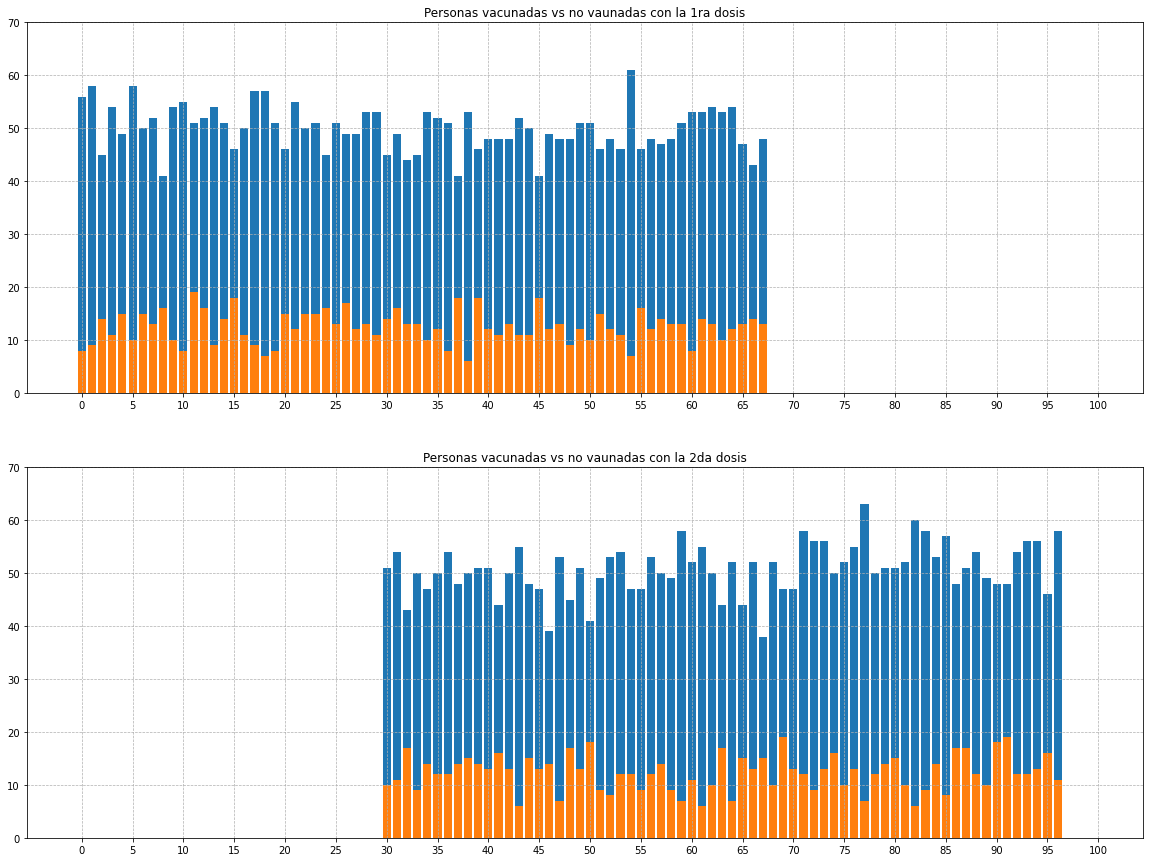

In [24]:
x = np.arange(len(vacunados1))
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
ax1.set_title('Personas vacunadas vs no vaunadas con la 1ra dosis')
ax1.bar(x, vacunados1)
ax1.bar(x, no_vacunados1)
ax1.grid(linestyle='--', linewidth=0.7)
ax1.set_xticks(np.arange(0,101,5))
ax1.set_yticks(np.arange(0, 71, 10))

ax2.set_title('Personas vacunadas vs no vaunadas con la 2da dosis')
ax2.bar(x, vacunados2)
ax2.bar(x, no_vacunados2)
ax2.grid(linestyle='--', linewidth=0.7)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_yticks(np.arange(0, 71, 10))
fig.show()

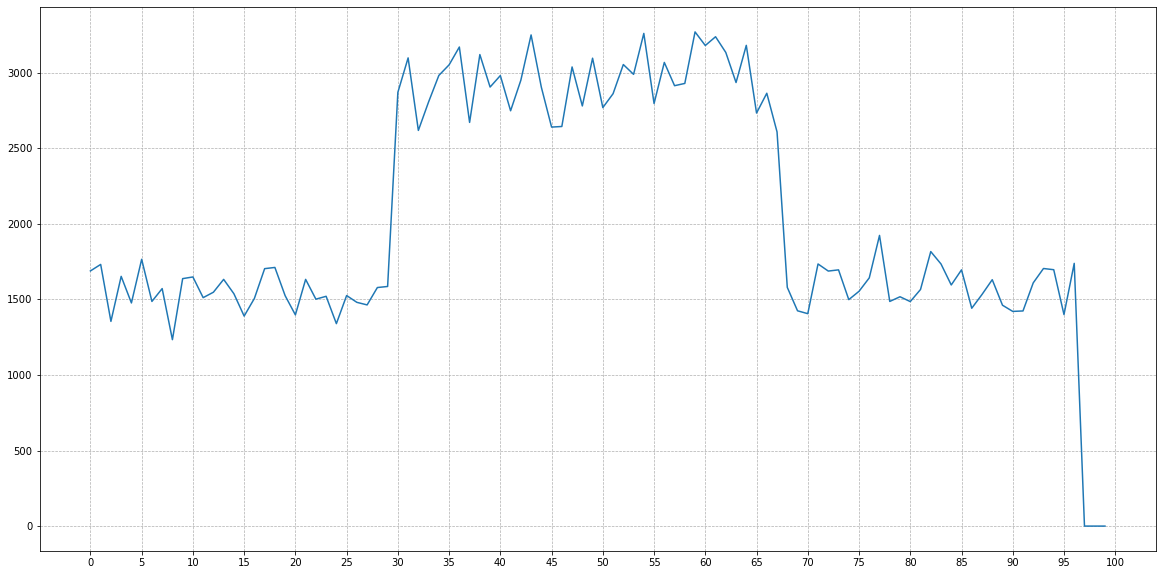

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,101,5))
plt.grid(linestyle='--', linewidth=0.7)
plt.plot(np.arange(len(tiempo_espera)), tiempo_espera)
plt.show()

[1] http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

[2] https://www.primicias.ec/noticias/sociedad/adultos-mayores-segunda-dosis/